In [1]:
import numpy as np
import os
from sklearn.cluster import KMeans, OPTICS
from sklearn.preprocessing import StandardScaler
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset, to_sklearn_dataset
import matplotlib.pyplot as plt
%matplotlib inline


/work/08550/qz3485/miniconda3/envs/data_science/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
rootdir = '../output_data'
starlink_names = []
starlink_data = []
for subdir, dirs, files in os.walk(rootdir):
    files.sort()
    for file in files:
        filepath = os.path.join(subdir,file)
        starlink_names.append(filepath)

        starlink_data.append(np.loadtxt(filepath))

starlink_data = to_time_series_dataset(starlink_data)
print(starlink_data.shape)


(1984, 8018, 10)


In [3]:
def kmeans_elbow(data: np.ndarray, num_cluster: int):
    '''
    Calculates the sum of squares for different number of clusters using K-means
    This allows to select an optimal number of cluster
    '''
    sum_squares = np.zeros(num_cluster-1)
    for i in range(2, num_cluster+1):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
        print(kmeans.inertia_)
        sum_squares[i-2] = kmeans.inertia_
    
    plt.figure(figsize=(12, 7.5))
    print(sum_squares.shape, np.arange(2, num_cluster+1).shape)
    plt.plot(np.arange(2, num_cluster+1), sum_squares)
    plt.ylabel('Sum of Squares', fontsize = 14)
    plt.xlabel('Number of clusters', fontsize = 14)
    plt.show()

def ts_kmeans_elbow(data: np.ndarray, num_cluster: int):
    '''
    Calculates the sum of squares for different number of clusters using times series K-means
    This allows to select an optimal number of cluster
    '''
    sum_squares = np.zeros(num_cluster-1)
    for i in range(2, num_cluster+1):
        ts_kmeans = TimeSeriesKMeans(n_clusters=i, metric="dtw", random_state=0, n_jobs=-1).fit(data)
        print(ts_kmeans.inertia_)
        sum_squares[i-2] = ts_kmeans.inertia_
    
    plt.figure(figsize=(12, 7.5))
    plt.plot(np.arange(2, num_cluster+1), sum_squares)
    plt.ylabel('Sum of Squares', fontsize = 14)
    plt.xlabel('Number of clusters', fontsize = 14)
    plt.show()


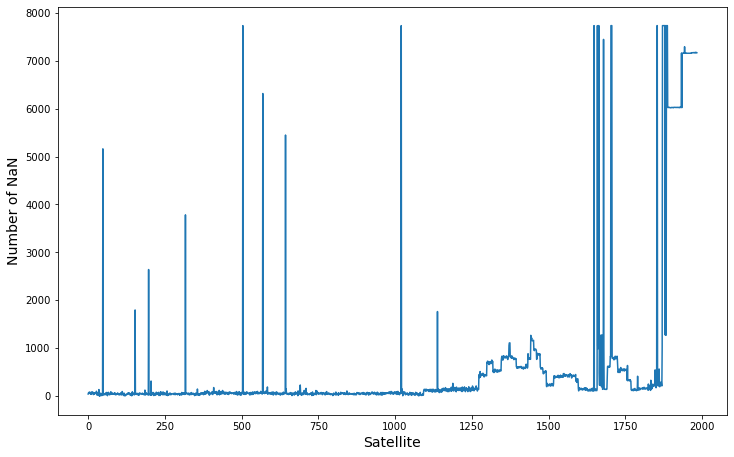

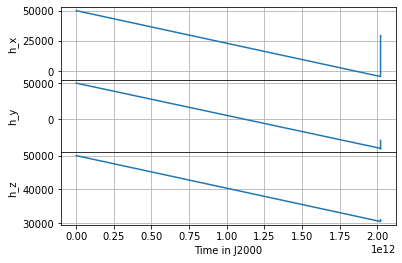

In [4]:
size_nan = np.isnan(starlink_data[:,:,8:9]).sum(axis=1)
ind_many_nan = np.argwhere(size_nan>2000)

problem_satellite = starlink_data[ind_many_nan[0][0],:,:]
problem_satellite = np.nan_to_num(problem_satellite, nan = 50000)
t = problem_satellite[:,0]
h = problem_satellite[:,7:10]


plt.figure(figsize=(12, 7.5))
plt.plot(size_nan)
plt.ylabel('Number of NaN', fontsize = 14)
plt.xlabel('Satellite', fontsize = 14)
plt.show()


fig, axs =plt.subplots(3,1, sharex= True)
axs[0].plot(t,h[:,0])
axs[0].set_ylabel('h_x')
axs[1].plot(t,h[:,1])
axs[1].set_ylabel('h_y')
axs[2].plot(t,h[:,2])
axs[2].set_ylabel('h_z')
axs[2].set_xlabel('Time in J2000')
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
fig.subplots_adjust(hspace=0)



In [5]:

time = starlink_data[:, :100, :1]
angular_momentum_x = starlink_data[:, :100, 7]
angular_momentum_y = starlink_data[:, :100, 8]
angular_momentum_z = starlink_data[:, :100, 9]

normed_angular_momentum_x = TimeSeriesScalerMeanVariance().fit_transform(angular_momentum_x)
normed_angular_momentum_y = TimeSeriesScalerMeanVariance().fit_transform(angular_momentum_y)
normed_angular_momentum_z = TimeSeriesScalerMeanVariance().fit_transform(angular_momentum_z)

print(time.shape)
print(normed_angular_momentum_x.shape)


(1984, 100, 1)
(1984, 100, 1)


14179.120376589737
10648.992026968446
8114.532110559943
6670.037647587577
5851.779175862903
5251.067472823965
4465.9502976701815
4051.201226208147
3560.2674456021327
(9,) (9,)


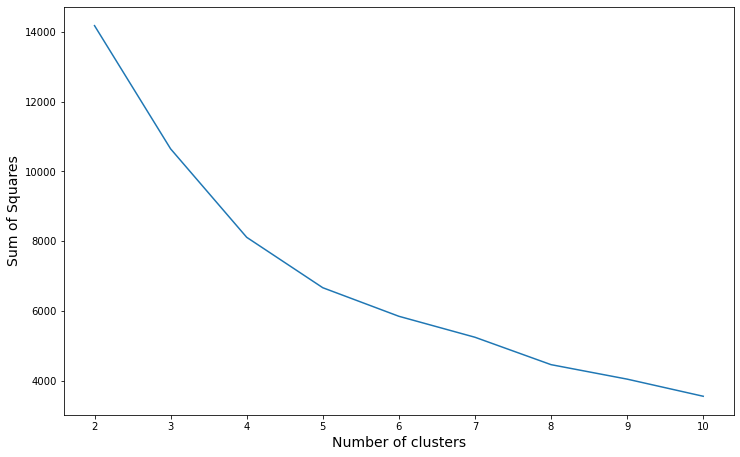

8114.532110559943


In [6]:
kmeans_elbow(np.squeeze(normed_angular_momentum_x), num_cluster=10)

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(np.squeeze(normed_angular_momentum_x))
print(kmeans.inertia_)


In [7]:
# optics = cluster.OPTICS()
# optics.fit(normed_angular_momentum)
# print(len(np.unique(optics.labels_)))



In [ ]:
ts_kmeans_elbow(normed_angular_momentum_x, num_cluster=10)

ts_kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0, n_jobs=-1)
ts_kmeans.fit(normed_angular_momentum_x)
print(ts_kmeans.inertia_)


In [ ]:
fig, axs =plt.subplots(3,1, sharex= True)
axs[0].plot(time, normed_angular_momentum_x)
axs[0].set_ylabel('h_x')
axs[1].plot(time, normed_angular_momentum_y)
axs[1].set_ylabel('h_y')
axs[2].plot(time, normed_angular_momentum_z)
axs[2].set_ylabel('h_z')
axs[2].set_xlabel('Time in J2000')
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
fig.subplots_adjust(hspace=0)

fig, axs2 = plt.subplots()
axs2.plot(time)
axs2.set_ylabel('Time in J2000')
axs2.set_xlabel('Index')
plt.show()
